In [1]:
from pycocotools.coco import COCO
import scipy.io
import os, json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def autolabel(graph):
    for rect in graph:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom', rotation=90)

In [3]:
DATASET_PATH = '/data/dataset/mscoco2014/'
'Train:', len(os.listdir(os.path.join(DATASET_PATH, 'train2014'))), 'Val:', len(os.listdir(os.path.join(DATASET_PATH, 'val2014/')))

('Train:', 82783, 'Val:', 40504)

In [4]:
coco = COCO(annotation_file='instances/instances_vcoco_all_2014.json')
# coco_train = COCO(annotation_file='instances/instances_train2014.json')
# coco_val = COCO(annotation_file='instances/instances_val2014.json')

loading annotations into memory...
Done (t=1.08s)
creating index...
index created!


In [5]:
with open(os.path.join('vcoco', 'vcoco_train.json'), 'rt') as f:
    vcoco_train = json.load(f)
with open(os.path.join('vcoco', 'vcoco_val.json'), 'rt') as f:
    vcoco_val = json.load(f)
with open(os.path.join('vcoco', 'vcoco_test.json'), 'rt') as f:
    vcoco_test = json.load(f)

In [6]:
def Plot(vcoco, title):
    instances = {}
    for vco in vcoco:
        hoi = vco['action_name']
        role = vco['role_name']
        # print(hoi, role)
        instances[hoi] = 0
        for i, label in enumerate(vco['label']):
            if label==0:
                continue
            instances[hoi] += 1
    print(sum(instances.values()))

    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xticks(rotation=90)
    graph = plt.bar(instances.keys(), instances.values())
    autolabel(graph)
    plt.savefig(f'outputs/{title}.png')

11325
13141
22070


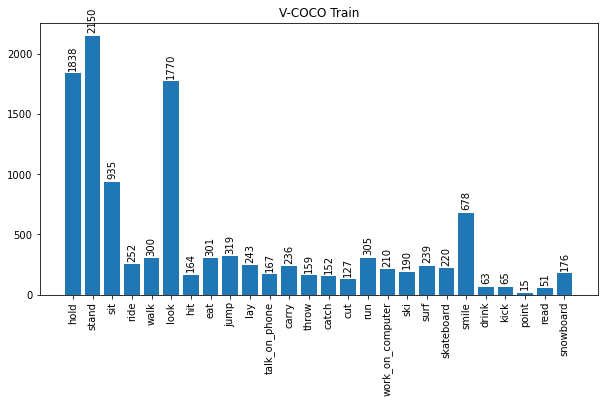

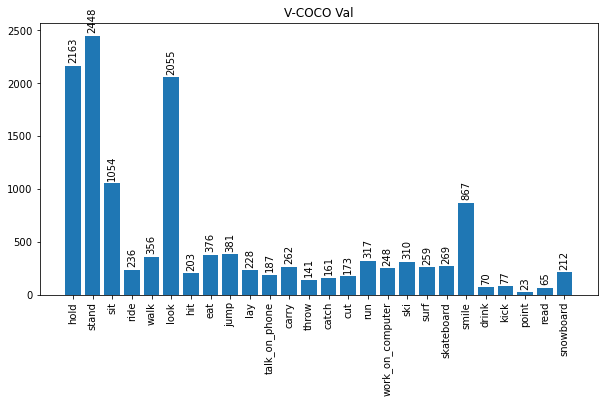

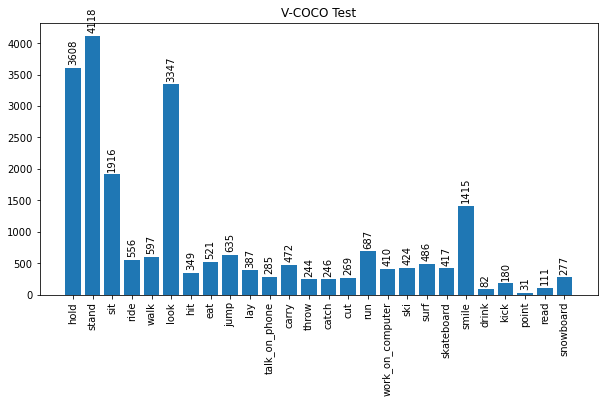

In [7]:
os.makedirs('outputs', exist_ok=True)
Plot(vcoco_train, 'V-COCO Train')
Plot(vcoco_val, 'V-COCO Val')
Plot(vcoco_test, 'V-COCO Test')

In [8]:
vcoco = vcoco_train
vcoco[0].keys()

dict_keys(['image_id', 'ann_id', 'role_object_id', 'label', 'action_name', 'role_name', 'include'])

hold ['agent', 'obj']
surfboard


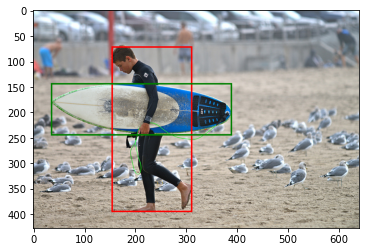

hold ['agent', 'obj']
cup


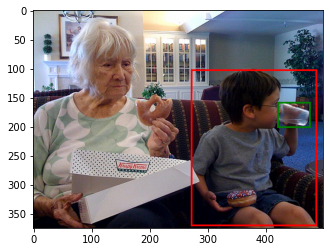

hold ['agent', 'obj']


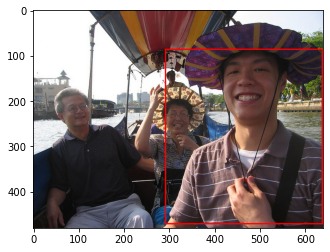

hold ['agent', 'obj']
fork


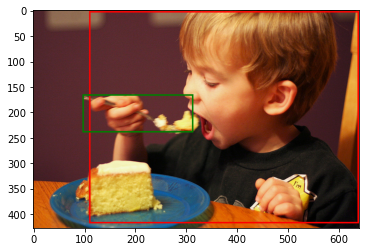

hold ['agent', 'obj']
knife


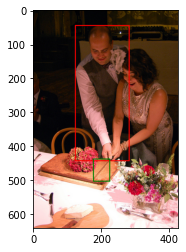

stand ['agent']


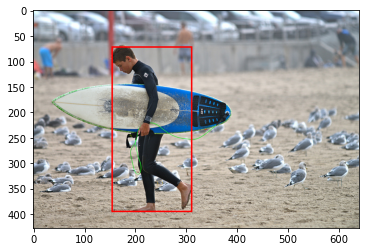

stand ['agent']


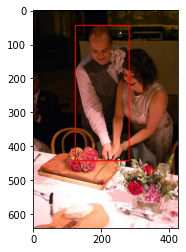

sit ['agent', 'instr']
couch


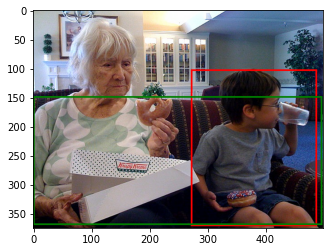

sit ['agent', 'instr']


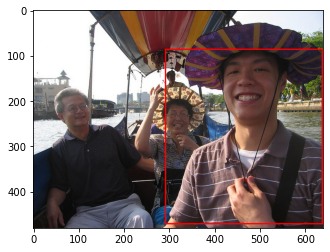

sit ['agent', 'instr']


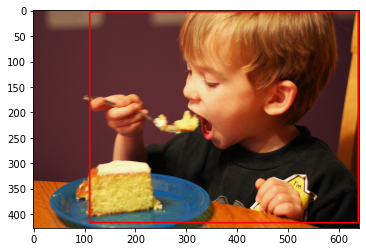

sit ['agent', 'instr']
chair


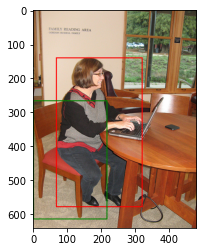

ride ['agent', 'instr']
boat


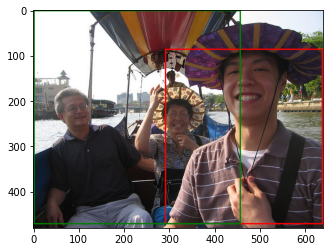

walk ['agent']


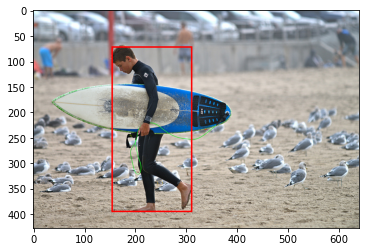

look ['agent', 'obj']


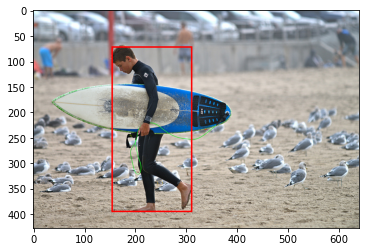

look ['agent', 'obj']
fork


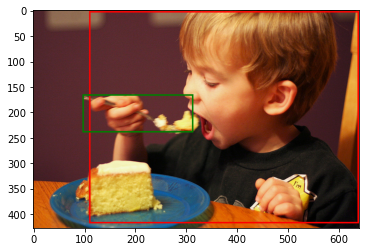

look ['agent', 'obj']
knife


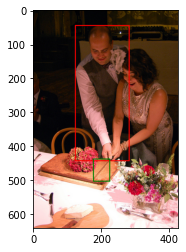

look ['agent', 'obj']
laptop


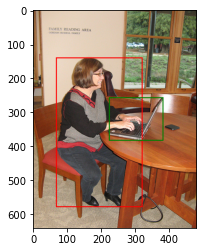

eat ['agent', 'obj', 'instr']
cake
fork


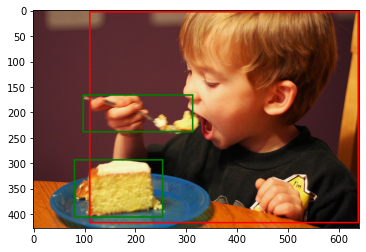

carry ['agent', 'obj']
surfboard


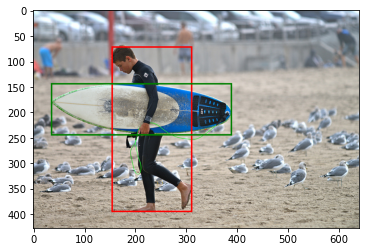

cut ['agent', 'instr', 'obj']
knife
cake


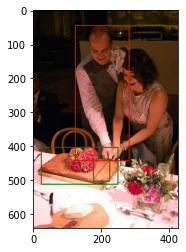

work_on_computer ['agent', 'instr']
laptop


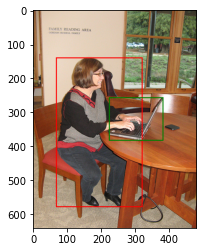

smile ['agent']


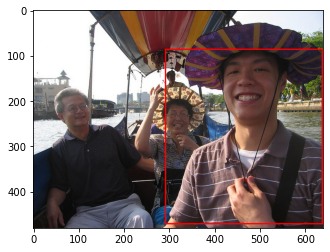

smile ['agent']


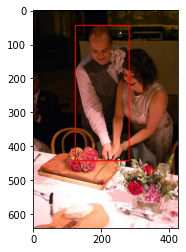

smile ['agent']


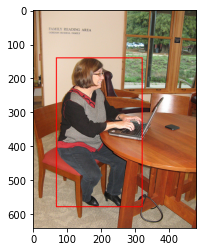

drink ['agent', 'instr']
cup


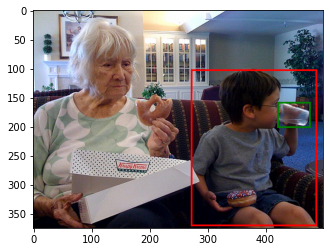

In [9]:
for vco in vcoco:
    hoi = vco['action_name']
    image_ids = vco['image_id']
    role_name = vco['role_name']
    ann_ids = vco['ann_id']
    role_ids = vco['role_object_id']
    role_ids = np.asarray(role_ids).reshape([len(role_name),-1]).T
    for i, label in enumerate(vco['label']):
        if label==0 or i>5:
            continue
        print(hoi, role_name)
        coco_image = coco.loadImgs(image_ids[i])[0]
        coco_ann = coco.loadAnns(ann_ids[i])[0]
        img_path = os.path.join(DATASET_PATH, 'train2014', coco_image['file_name'])
        img = Image.open(img_path).convert("RGB")
        draw = ImageDraw.Draw(img)
        bbox = coco_ann['bbox']
        draw.rectangle((bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]), outline='red', width=3)
        for id in range(1,len(role_ids[i])):
            ann_id = int(role_ids[i][id])
            if ann_id == 0:
                continue
            coco_role = coco.loadAnns(ann_id)[0]
            if coco_role is None:
                continue
            print(coco.cats[coco_role['category_id']]['name'])
            bbox = coco_role['bbox']
            draw.rectangle((bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]), outline='green', width=3)
        plt.imshow(img)
        plt.show()
#sum(positives.values())

In [ ]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", size=20)
count = 1
for _, anno in coco.imgs.items():
    img_path = os.path.join(DATASET_PATH, 'train2014', anno['file_name'])
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    print(anno)

    ids = coco.getAnnIds(anno['id'])
    cmap = plt.cm.get_cmap("hsv", len(ids) + 1)

    for i, id in enumerate(ids):
        ann = coco.loadAnns(id)[0]
        cat_id = int(ann['category_id'])
        color = cmap(i, bytes=True)

        bbox = ann['bbox']
        print(coco.cats[cat_id]['name'], bbox)
        draw.rectangle((bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]), outline=color, width=3)
        text_area = draw.textbbox((bbox[0], bbox[1]), coco.cats[cat_id]['name'], font=font, anchor="lb")
        draw.rectangle(text_area, fill=color)
        draw.text((bbox[0], bbox[1]), coco.cats[cat_id]['name'], fill='white', font=font, anchor="lb")

        # draw.line(((int(bbox_ob[0])+int(bbox_ob[1]))/2, (int(bbox_ob[2])+int(bbox_ob[3]))/2, (int(bbox_hu[0])+int(bbox_hu[1]))/2, (int(bbox_hu[2])+int(bbox_hu[3]))/2), fill=color, width=3)
    
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()
    count += 1
    if count > 5:
        break

## オブジェクトごとのバウンディングボックス数

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
graph = plt.bar(objects.keys(), objects.values())

autolabel(graph)
plt.plot()
print(sum(objects.values()))

## オブジェクトごとのインタラクション数

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# plt.tick_params(labelsize=5)
summ = 0
for key, value in instances.items():
    graph = plt.bar(key, sum(value.values()))
    autolabel(graph)
    summ += sum(value.values())
plt.plot()
print(summ)

## HOIごとのオブジェクトの分布

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# plt.tick_params(labelsize=5)
summ = 0
for key, value in instances.items():
    plt.bar(value.keys(), value.values())
    summ += sum(value.values())
plt.plot()
print(summ)